In [1]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
from pandas import read_csv
import matplotlib.patheffects as pe

/Users/jimig/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def make_obs_card(title, image, objtype, dtype):
    '''
    Fucntion to make Observation cards for MAST Match!
    
    Parameters
    ------------
    title: str
        Title for Card, typically name of object
    image: str
        File containing image to use for background art
    objtype: str
        Object type (star, galaxy, nebula, planet)
    dtype: str
        Data type (image, spectrum, timeseries, catalog)
    
    '''
    fig, ax = plt.subplots()
    fig.set_size_inches((2.5,3.5))

    
    # Background Image
    img = Image.open(f'obs_card_imgs/{image}')
    img = img.resize((1000,1400)) #card size is 2.5 x 3.5 inches
    ax.imshow(img,zorder=0, extent=(0,1000,0,1400))

    # Add Circles for Icons
    circle1 = plt.Circle((275, 250), 200, color='white', alpha=0.5, zorder=1)
    circle2 = plt.Circle((725, 250), 200, color='white', alpha=0.5, zorder=1)
    ax.add_patch(circle1)
    ax.add_patch(circle2)

    # Add Object Icon
    icon1 = Image.open(f'icons/{objtype}.png').resize((250,250))
    x,y = 150,125
    ax.imshow(icon1, extent=(x,x+250,y,y+250),zorder=3)

    # Add Data Icon
    icon2 = Image.open(f'icons/{dtype}.png').resize((250,250))
    x,y = 600,125
    ax.imshow(icon2, extent=(x,x+250,y,y+250),zorder=3)

    # Title Text
    if len(title)>10: # title too long
        if title.count(' ') == 1:
            title = title.replace(' ','\n') # add line break
        else:
            title_split = title.split(' ')
            if len(title_split[0] + title_split[1])>10:
                if len(title_split[1] + ' ' + title_split[2]) < 10:
                    title = title_split[0] + '\n' + title_split[1] + ' ' + title_split[2]
                else:
                    title = title_split[0] + '\n' + title_split[1] + '\n' + title_split[2]
            else:
                title = title_split[0] + ' ' + title_split[1] + '\n' + title_split[2]
        
    ax.text(75, 1300, title, ha='left', va='top', color='white',
             fontsize=18, font='silom', fontweight='bold',
            path_effects=[pe.withStroke(linewidth=4, foreground="k")])


    # Fun Fact text?

    # credit text?
    #ax.text(0, 0, f'{url}', ha='left', va='bottom', color='white',
    #         fontsize=5, font='Georgia', fontweight='bold')


    # Additional Formatting
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1400)
    ax.set_axis_off()
    plt.axis('off')

    plt.savefig(f'final_cards/OBS_{image}', bbox_inches='tight', pad_inches=0, dpi=200)
    plt.show()
    

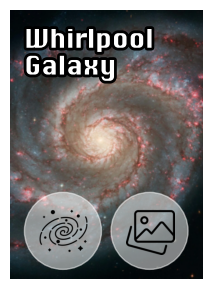

In [3]:
title = 'Whirlpool Galaxy'
image = 'whirlpool.png'
objtype='galaxy'
dtype='image'
make_obs_card(title, image, objtype, dtype)

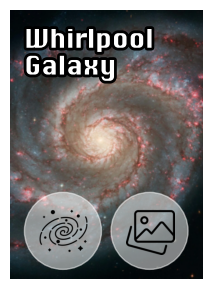

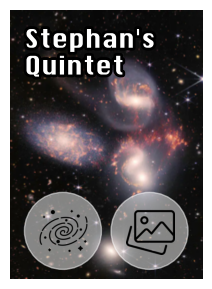

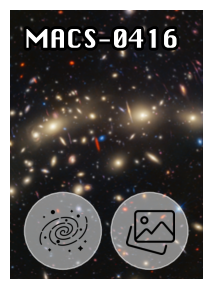

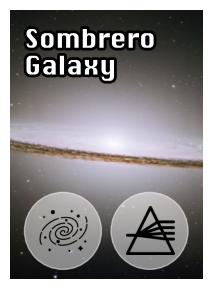

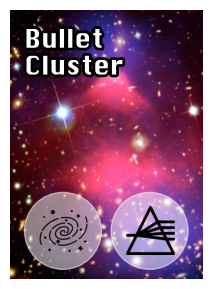

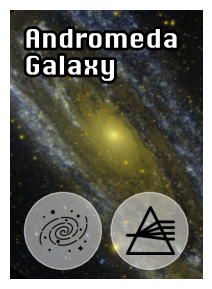

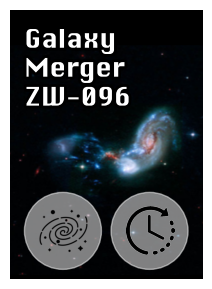

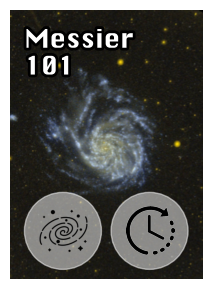

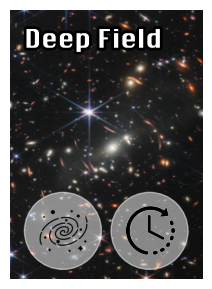

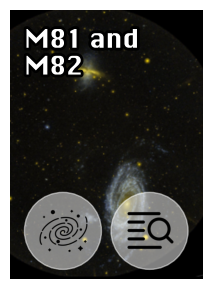

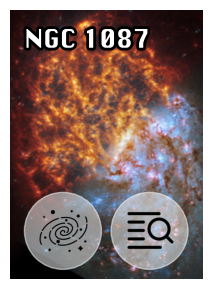

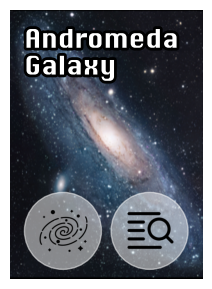

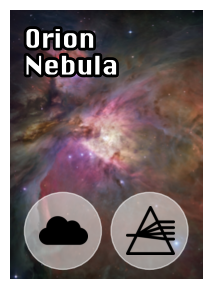

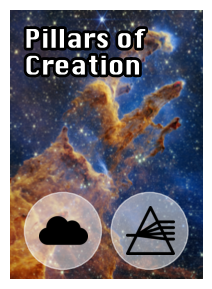

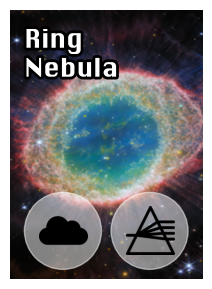

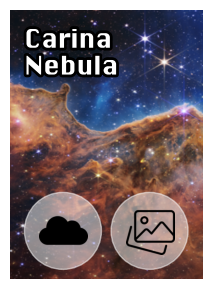

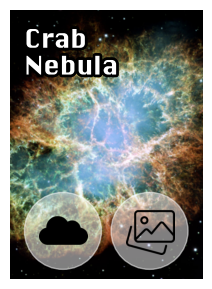

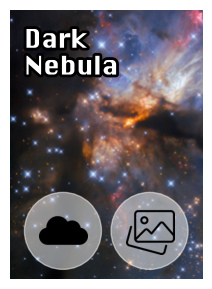

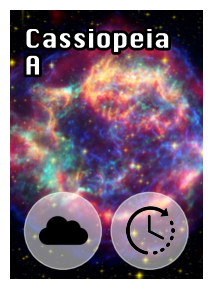

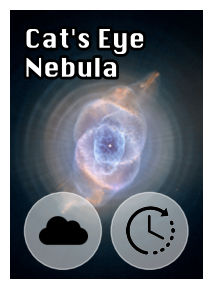

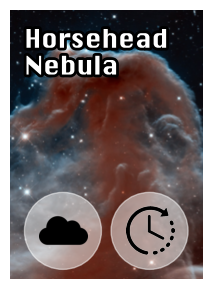

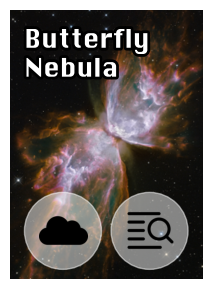

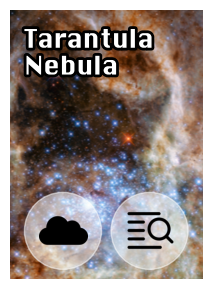

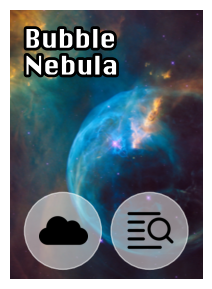

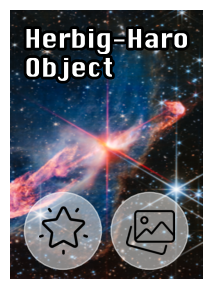

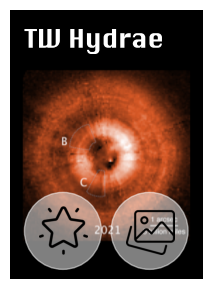

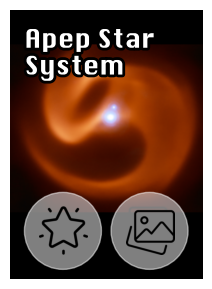

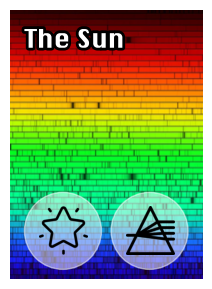

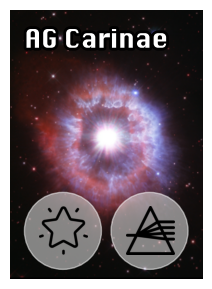

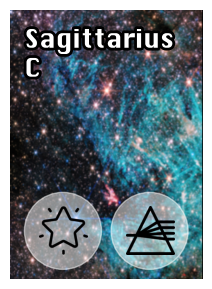

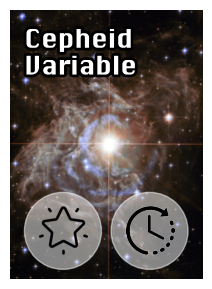

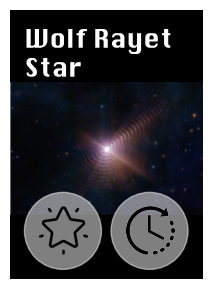

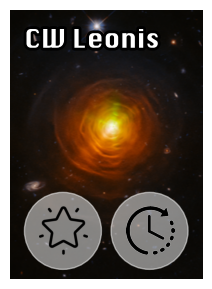

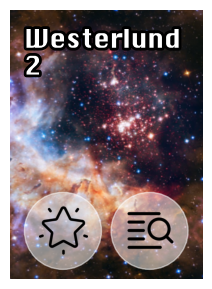

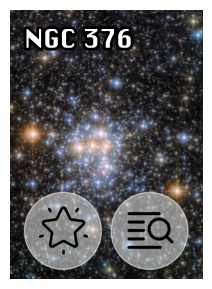

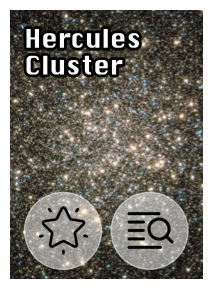

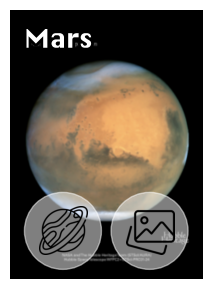

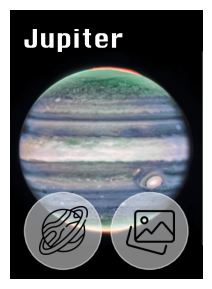

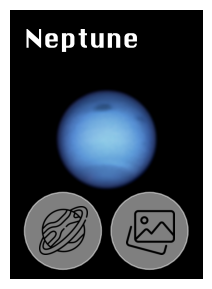

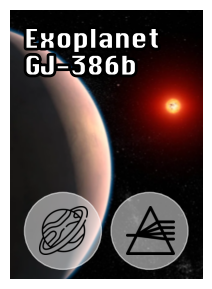

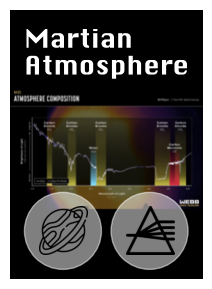

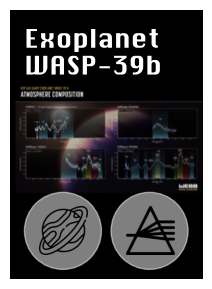

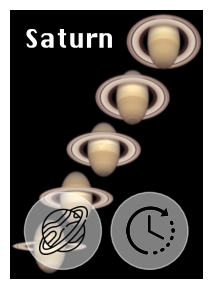

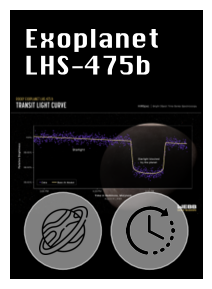

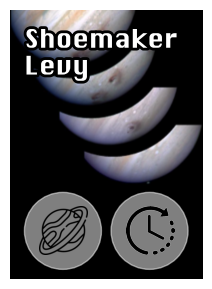

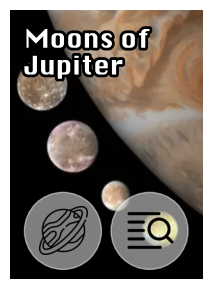

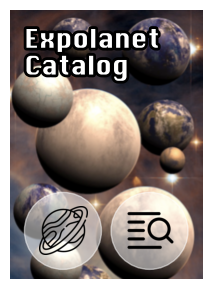

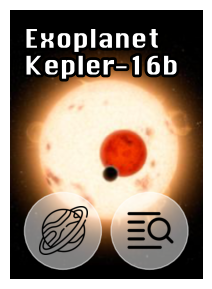

In [4]:
# Iterate over all cards in the csv file
obs_cards = read_csv('obs_cards.csv', dtype=str)

for i,card in obs_cards.iterrows():
    title = card['title']
    image = card['image']
    objtype = card['objtype']
    dtype = card['dtype']
    make_obs_card(title, image, objtype, dtype)
   
